In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.59215686, 0.64313725,
        0.63137255, 0.39607843, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.58823529, 0.94509804, 0.37647059, 0.08235294,
        0.18823529, 0.78431373, 0.80784314, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.51764706, 0.83529412, 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train[55999].shape

(28, 28)

In [ ]:
X_train[0].shape

(28, 28)

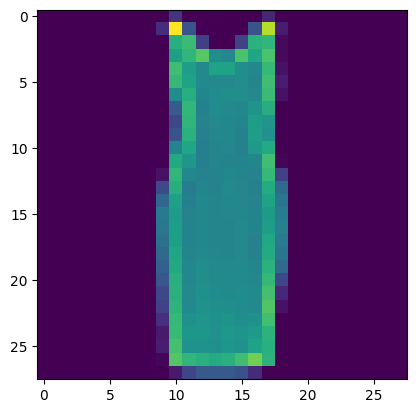

In [ ]:
plt.imshow (X_train[999])

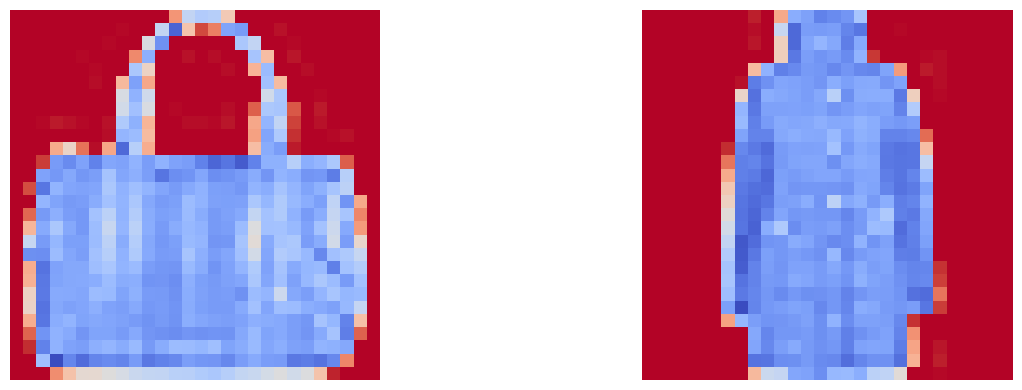

In [ ]:
plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'coolwarm_r')
        plt.axis('off')

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]], class_names[y_train[13]]

('Bag', 'Sneaker')

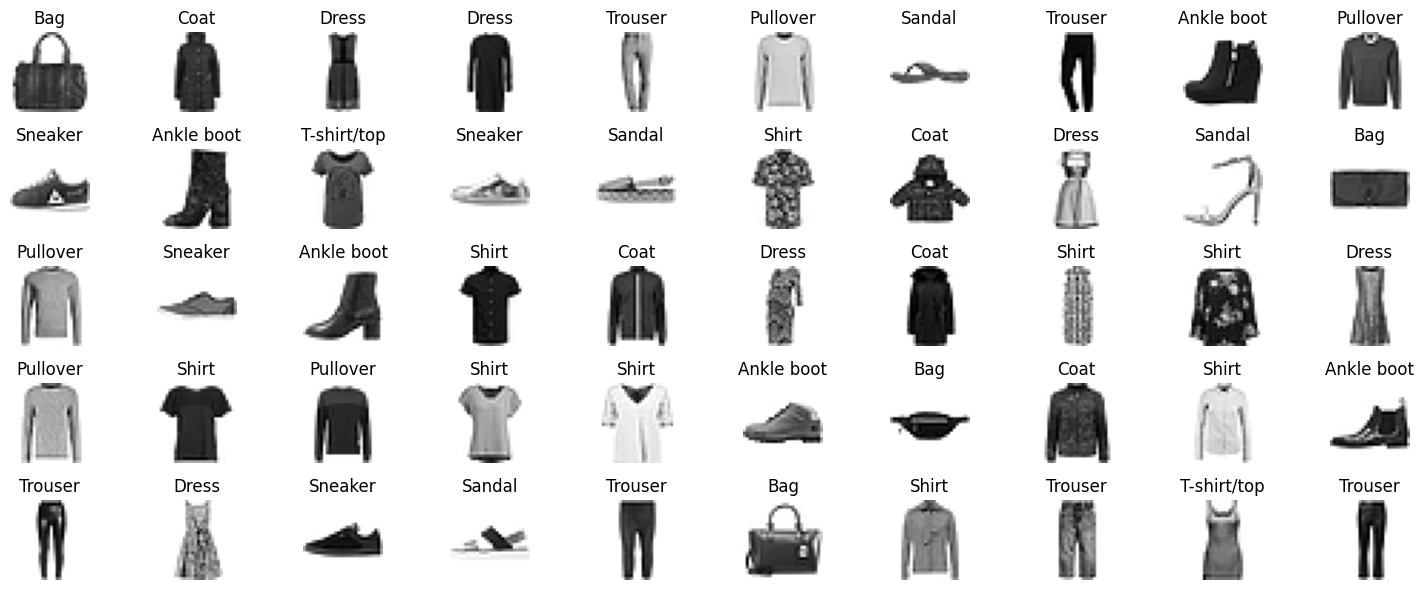

In [ ]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90350 (352.93 KB)
Trainable params: 90350 

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)

Epoch 1/50
1750/1750 [==============================] - 7s 3ms/step - loss: 0.5455 - accuracy: 0.8094 - val_loss: 62.9720 - val_accuracy: 0.8290
Epoch 2/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8609 - val_loss: 57.9210 - val_accuracy: 0.8353
Epoch 3/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8731 - val_loss: 58.4008 - val_accuracy: 0.8315
Epoch 4/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.8819 - val_loss: 51.3293 - val_accuracy: 0.8522
Epoch 5/50
1750/1750 [==============================] - 6s 4ms/step - loss: 0.3046 - accuracy: 0.8863 - val_loss: 60.8076 - val_accuracy: 0.8480
Epoch 6/50
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.8932 - val_loss: 53.1022 - val_accuracy: 0.8620
Epoch 7/50
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8949 - val_loss: 57.1134 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.8865


[0.5135784149169922, 0.8865000009536743]

In [ ]:
y_probs = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds = y_probs.argmax(axis = 1)

y_preds[100]

3

In [ ]:
y_probs[100]

array([1.6585692e-03, 1.6193204e-06, 6.1497794e-08, 9.9831599e-01,
       1.4213190e-09, 2.6050683e-23, 2.3619590e-05, 1.4219123e-21,
       1.6637199e-09, 3.8631627e-24], dtype=float32)